In [9]:
import numpy as np
import tensorflow as tf

In [10]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

In [11]:
#Load training and test data
(trainData, trainLabels), (testData, testLabels) = imdb.load_data(num_words = 10000)

#Transform test and training data to vectors for inputs
def vectorize(sequences, ndmin=10000):
    results = np.zeros((len(sequences), ndmin))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

#Input training data vectorized
xTrain = vectorize(trainData)
xTest = vectorize(testData)

#Test labels as scalars
yTrain = np.asarray(trainLabels).astype('float32')
yTest = np.asarray(testLabels).astype('float32')

#Test print to ensure working
print(len(xTrain))
xTrain[0]

25000


array([0., 1., 1., ..., 0., 0., 0.])

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.5418 - acc: 0.7755 - val_loss: 0.4186 - val_acc: 0.8658
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3445 - acc: 0.8917 - val_loss: 0.3293 - val_acc: 0.8755
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2585 - acc: 0.9161 - val_loss: 0.2949 - val_acc: 0.8832
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2083 - acc: 0.9312 - val_loss: 0.2847 - val_acc: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1745 - acc: 0.9439 - val_loss: 0.2877 - val_acc: 0.8832
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1475 - acc: 0.9534 - val_loss: 0.2805 - val_acc: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1254 - acc: 0.9621 - val_loss: 0.2877 - val_acc: 0.8853
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1124 - a

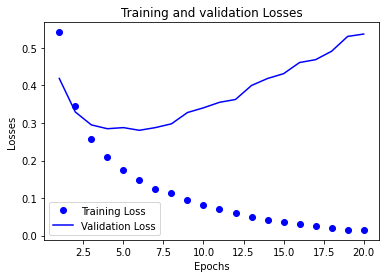

In [12]:
#Set up model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

xVal = xTrain[:10000]
partialX = xTrain[10000:]
yVal = yTrain[:10000]
partialY = yTrain[10000:]

history = model.fit(partialX, partialY, epochs = 20, batch_size = 512, validation_data = (xVal, yVal))

import matplotlib.pyplot as plt

history = history.history
history.keys()
losses = history['loss']
valLosses = history['val_loss']
acc = history['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, losses, 'bo', label='Training Loss')
plt.plot(epochs, valLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()
              



Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.6511 - acc: 0.6111 - val_loss: 0.5820 - val_acc: 0.7979
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5515 - acc: 0.7427 - val_loss: 0.4650 - val_acc: 0.8617
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4680 - acc: 0.8029 - val_loss: 0.3850 - val_acc: 0.8775
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4092 - acc: 0.8401 - val_loss: 0.3384 - val_acc: 0.8816
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3565 - acc: 0.8719 - val_loss: 0.2996 - val_acc: 0.8850
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3177 - acc: 0.8917 - val_loss: 0.2892 - val_acc: 0.8908
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2842 - acc: 0.9033 - val_loss: 0.2743 - val_acc: 0.8899
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2490 - a

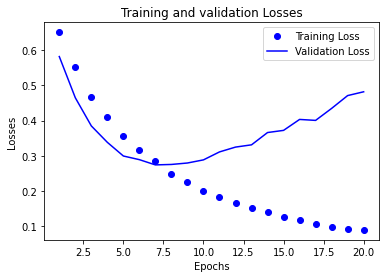

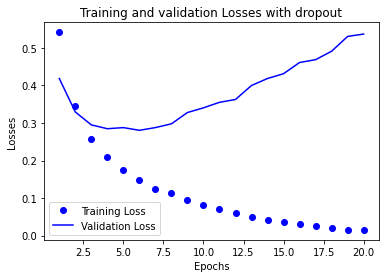

In [14]:
#Amending the previous model with dropout
#Dropout applies to a layer a random zero value in the output during training
#Introducing noise in the form of zero values in output layer can break up happenstance patterns that are not significant

#Define and compile a new model with dropout 
dropoutModel = models.Sequential()
dropoutModel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropoutModel.add(layers.Dropout(0.5))
dropoutModel.add(layers.Dense(16, activation='relu'))
dropoutModel.add(layers.Dropout(0.5))
dropoutModel.add(layers.Dense(1, activation='sigmoid'))
dropoutModel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#Obtain relavent stats in the history
history = dropoutModel.fit(partialX, partialY, epochs=20, batch_size=512, validation_data=(xVal, yVal))

history = history.history
history.keys()
dropoutLosses = history['loss']
dropoutValLosses = history['val_loss']
dropoutAcc = history['acc']

epochs = range(1, len(acc) + 1)

#Plot
plt.plot(epochs, dropoutLosses, 'bo', label='Training Loss')
plt.plot(epochs, dropoutValLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.plot(epochs, losses, 'bo', label='Training Loss')
plt.plot(epochs, valLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses with dropout')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

In [15]:
#Both models seem to severely underfit (wherein a model is unable to accurately model the training data)
#Let's try reducing the epochs

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

xVal = xTrain[:10000]
partialX = xTrain[10000:]
yVal = yTrain[:10000]
partialY = yTrain[10000:]

history = model.fit(partialX, partialY, epochs = 10, batch_size = 512, validation_data = (xVal, yVal))

import matplotlib.pyplot as plt

history = history.history
history.keys()
losses = history['loss']
valLosses = history['val_loss']
acc = history['acc']

Epoch 1/10
30/30 [==============================] - 2s 68ms/step - loss: 0.5463 - acc: 0.7618 - val_loss: 0.4294 - val_acc: 0.8389
Epoch 2/10
30/30 [==============================] - 1s 19ms/step - loss: 0.3462 - acc: 0.8885 - val_loss: 0.3252 - val_acc: 0.8850
Epoch 3/10
30/30 [==============================] - 1s 18ms/step - loss: 0.2566 - acc: 0.9173 - val_loss: 0.2915 - val_acc: 0.8864
Epoch 4/10
30/30 [==============================] - 0s 16ms/step - loss: 0.2055 - acc: 0.9327 - val_loss: 0.2976 - val_acc: 0.8790
Epoch 5/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1724 - acc: 0.9443 - val_loss: 0.2755 - val_acc: 0.8877
Epoch 6/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1478 - acc: 0.9527 - val_loss: 0.2995 - val_acc: 0.8813
Epoch 7/10
30/30 [==============================] - 0s 17ms/step - loss: 0.1251 - acc: 0.9623 - val_loss: 0.2957 - val_acc: 0.8848
Epoch 8/10
30/30 [==============================] - 1s 17ms/step - loss: 0.1088 - a

Epoch 1/10
30/30 [==============================] - 3s 50ms/step - loss: 0.6591 - acc: 0.5999 - val_loss: 0.5849 - val_acc: 0.6597
Epoch 2/10
30/30 [==============================] - 1s 19ms/step - loss: 0.5674 - acc: 0.7517 - val_loss: 0.4989 - val_acc: 0.8598
Epoch 3/10
30/30 [==============================] - 1s 18ms/step - loss: 0.5012 - acc: 0.8146 - val_loss: 0.4358 - val_acc: 0.8744
Epoch 4/10
30/30 [==============================] - 1s 18ms/step - loss: 0.4419 - acc: 0.8562 - val_loss: 0.3940 - val_acc: 0.8713
Epoch 5/10
30/30 [==============================] - 1s 18ms/step - loss: 0.3987 - acc: 0.8794 - val_loss: 0.3579 - val_acc: 0.8814
Epoch 6/10
30/30 [==============================] - 1s 19ms/step - loss: 0.3539 - acc: 0.8997 - val_loss: 0.3396 - val_acc: 0.8807
Epoch 7/10
30/30 [==============================] - 1s 23ms/step - loss: 0.3252 - acc: 0.9071 - val_loss: 0.3211 - val_acc: 0.8773
Epoch 8/10
30/30 [==============================] - 1s 22ms/step - loss: 0.2940 - a

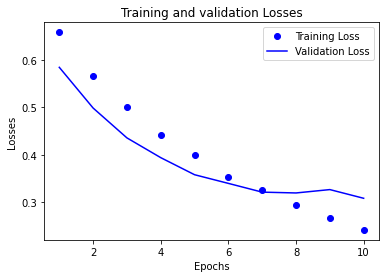

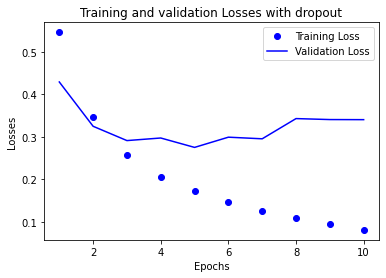

In [19]:
dropoutModel = models.Sequential()
dropoutModel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropoutModel.add(layers.Dropout(0.5))
dropoutModel.add(layers.Dense(16, activation='relu'))
dropoutModel.add(layers.Dropout(0.5))
dropoutModel.add(layers.Dense(1, activation='sigmoid'))
dropoutModel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#Obtain relavent stats in the history
history = dropoutModel.fit(partialX, partialY, epochs=10, batch_size=512, validation_data=(xVal, yVal))

history = history.history
history.keys()
dropoutLosses = history['loss']
dropoutValLosses = history['val_loss']
dropoutAcc = history['acc']

epochs = range(1, len(acc) + 1)

#Plot
plt.plot(epochs, dropoutLosses, 'bo', label='Training Loss')
plt.plot(epochs, dropoutValLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.plot(epochs, losses, 'bo', label='Training Loss')
plt.plot(epochs, valLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses with dropout')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()



In [ ]:
#Seems we acheived a much better fit with less epochs on the standard model, however the dropout model
#yet needs more tuning as it is still underfitting, though not as drastically as with epochs set to 20